In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
income_df=pd.read_csv('./data/income.csv')
income_df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


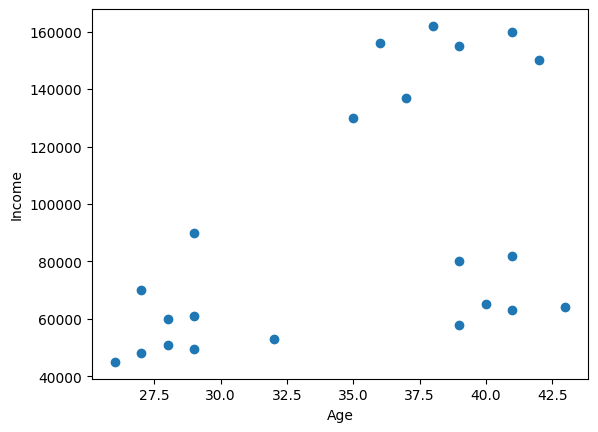

In [3]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(income_df.Age, income_df['Income($)'])

In [4]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(income_df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [5]:
income_df['cluster']=y_predicted
income_df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [6]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

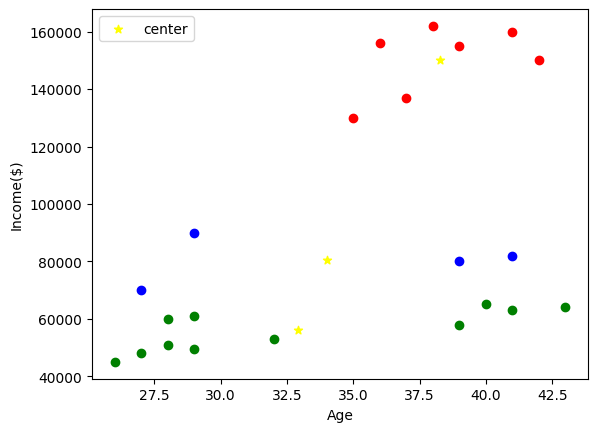

In [7]:
df1 = income_df[income_df.cluster == 0]
df2 = income_df[income_df.cluster == 1]
df3 = income_df[income_df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='green')
plt.scatter(df3.Age, df3['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', label='center', marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [8]:
scaler = MinMaxScaler()
scaler.fit(income_df[['Income($)']])
income_df['Income($)'] = scaler.transform(income_df[['Income($)']])

scaler.fit(income_df[['Age']])
income_df['Age'] = scaler.transform(income_df[['Age']])

income_df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


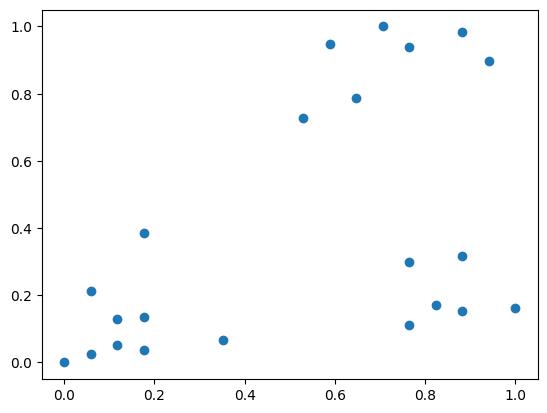

In [9]:
plt.scatter(income_df['Age'], income_df['Income($)'])

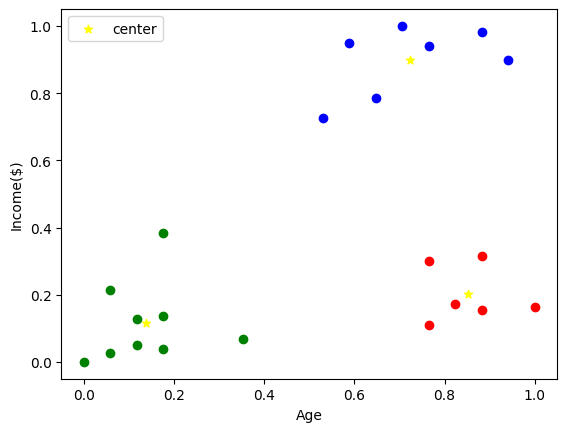

In [10]:
km2=KMeans(n_clusters=3)
y_predicted = km2.fit_predict(income_df[['Age', 'Income($)']])
income_df['cluster']=y_predicted

df1 = income_df[income_df.cluster == 0]
df2 = income_df[income_df.cluster == 1]
df3 = income_df[income_df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='green')
plt.scatter(df3.Age, df3['Income($)'], color='blue')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], color='yellow', label='center', marker='*')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [11]:

sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(income_df[['Age', 'Income($)']])
    sse.append(km.inertia_)

sse
    

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.40365551195705296,
 0.27612937677853544,
 0.2407627035421819,
 0.21078410308144438,
 0.15205897076959982,
 0.11655263060048202]

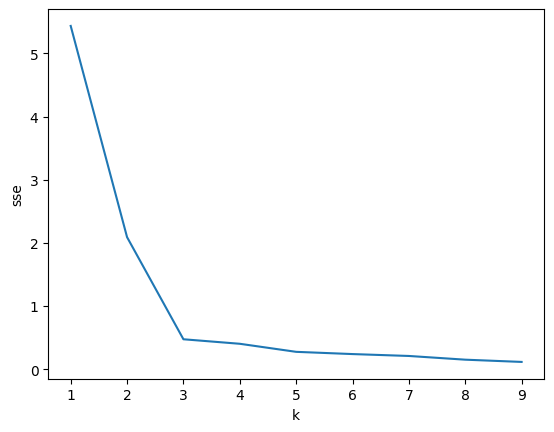

In [12]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_range, sse)

In [28]:
# Exercise
from sklearn.datasets import load_iris
iris_data = load_iris()
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [38]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
km2 = KMeans(n_clusters=3)
y_predicted = km2.fit_predict(iris_df[['petal length (cm)', 'petal width (cm)']])
iris_df['cluster'] = y_predicted
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [66]:
df1=iris_df[iris_df.cluster == 0]
df2=iris_df[iris_df.cluster == 1]
df3=iris_df[iris_df.cluster == 2]
km2.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

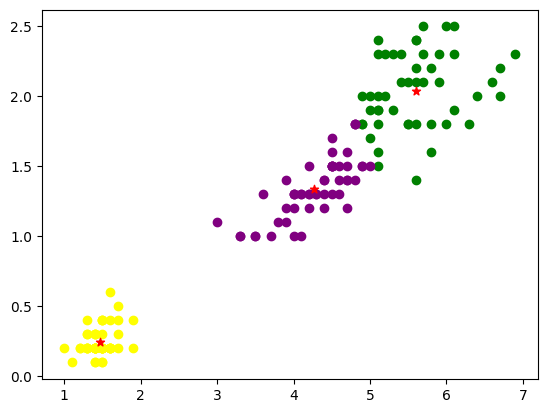

In [68]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='yellow')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color='purple')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], color='red', marker='*')

In [74]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(iris_df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)
sse

[550.8953333333334,
 86.39021984551395,
 31.412885668276978,
 20.299607803485397,
 13.983213141025642,
 11.51338604032714,
 9.54314139061422,
 8.064914098972924,
 7.564005012531329]

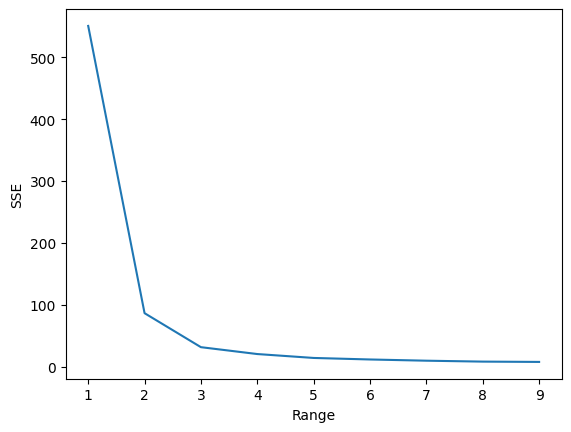

In [78]:
plt.xlabel("Range")
plt.ylabel("SSE")
plt.plot(range(1, 10), sse)